In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

# Import data and parse dates
df = pd.read_csv('fcc-forum-pageviews.csv', index_col='date', parse_dates=True)

# get the 2.5th and 97.5th percentiles of the 'value' column
value_low = df['value'].quantile(0.025)
value_high = df['value'].quantile(0.975)

# keep only the rows where the 'value' column is within the percentiles
df = df[(df['value'] >= value_low) & (df['value'] <= value_high)]

Figure(1600x600)


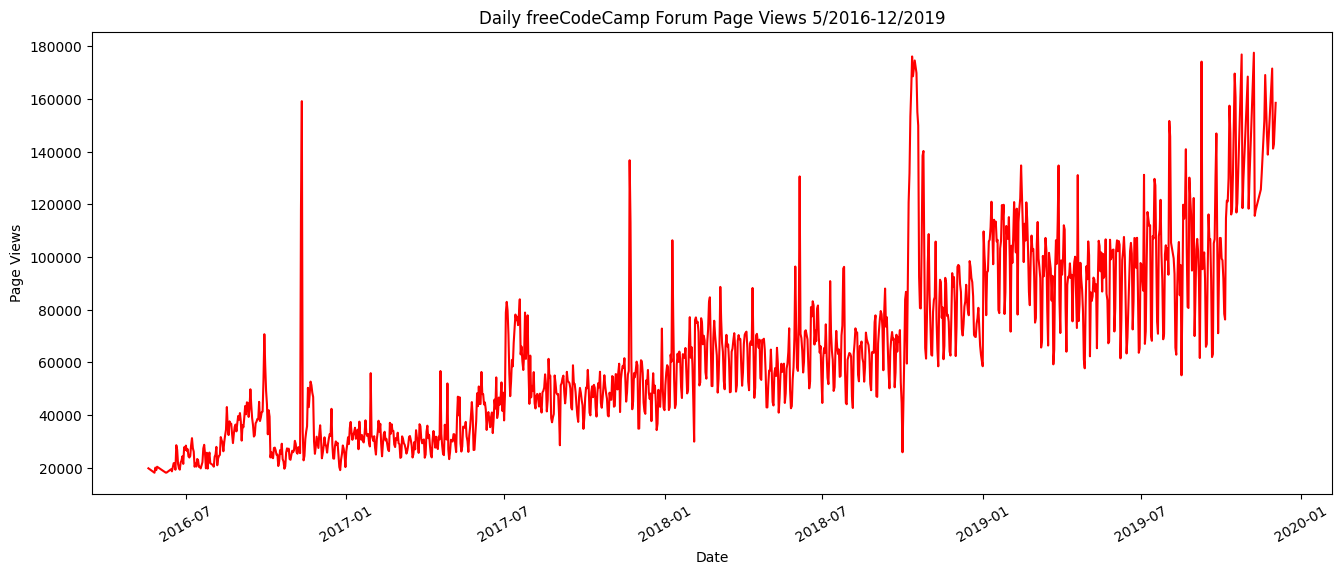

In [2]:
fig, ax = plt.subplots(figsize=(16, 6))
ax.plot(df.index, df['value'], color='r')
ax.set(title='Daily freeCodeCamp Forum Page Views 5/2016-12/2019',
       xlabel='Date', ylabel='Page Views')
plt.xticks(rotation=30)
print(fig)

In [3]:
df_bar = df.copy()
df_bar

,value
date,
2016-05-19,19736
2016-05-26,18060
2016-05-27,19997
2016-05-28,19044
2016-05-29,20325
...,...
2019-11-24,138875
2019-11-29,171584
2019-11-30,141161


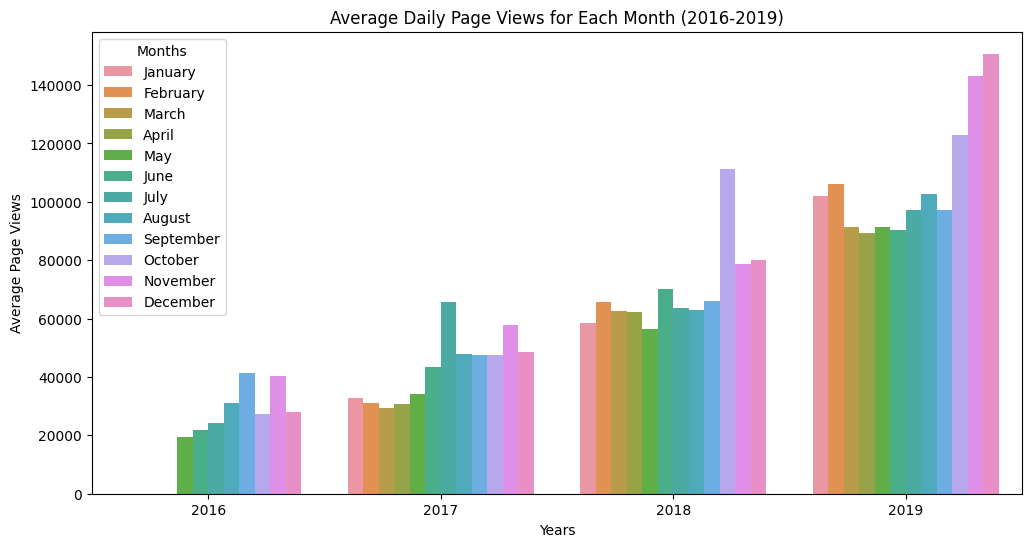

In [13]:
    # Copy and modify data for monthly bar plot
    df_bar = df.copy()
    df_bar['year'] = df_bar.index.year
    df_bar['month'] = df_bar.index.strftime('%B')
    # Group data by year and month, get mean
    df_bar = df_bar.groupby(['year', 'month'])['value'].mean().reset_index()

    # Set up fig and ax
    fig, ax = plt.subplots(figsize=(12, 6))
    month_order = [
        'January', 'February', 'March', 'April', 'May', 'June', 'July',
        'August', 'September', 'October', 'November', 'December'
    ]
    df_bar['month'] = pd.Categorical(df_bar['month'], categories=month_order, ordered=True)
    df_bar = df_bar.sort_values('month', ascending=False)  # Sort the DataFrame based on the month column
    sns.barplot(x='year', y='value', hue='month', data=df_bar, ax=ax)

    # Set title and axis labels
    ax.set(title='Average Daily Page Views for Each Month (2016-2019)',
           xlabel='Years',
           ylabel='Average Page Views')

    # Set legend
    ax.legend(title='Months', bbox_to_anchor=(0, 1), loc="upper left")

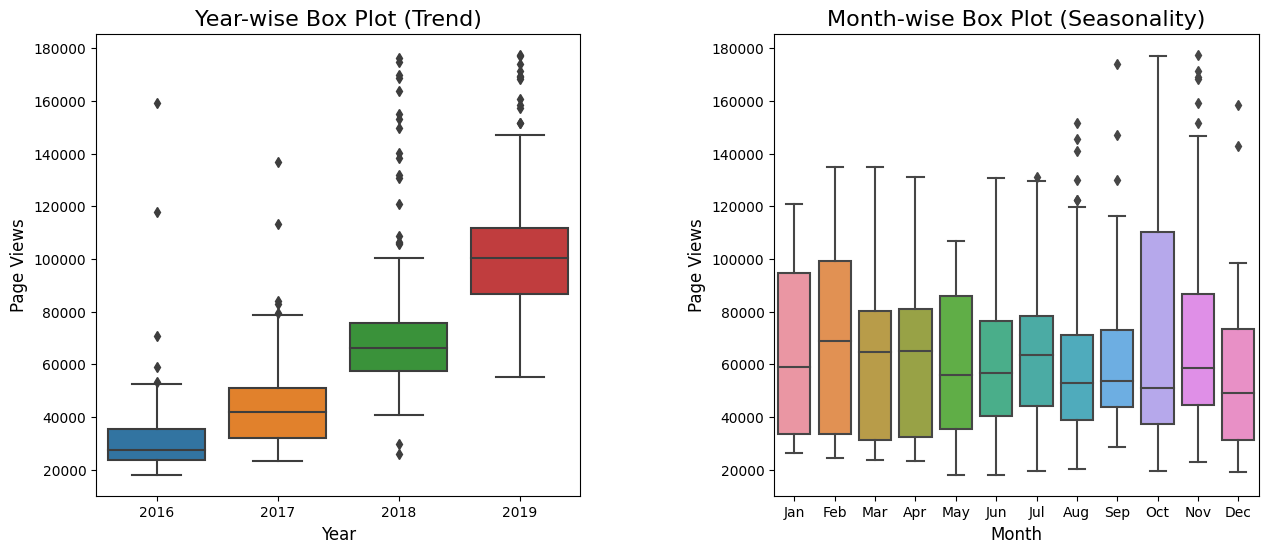

In [11]:
    # Prepare data for box plots
    df_box = df.copy()
    df_box.reset_index(inplace=True)
    df_box['year'] = df_box['date'].dt.year
    df_box['month'] = df_box['date'].dt.strftime('%b')

    # Set up the figure and axes for the first chart
    fig, axes = plt.subplots(1, 2, figsize=(15, 6))
    
    # Year-wise Box Plot (Trend)
    sns.boxplot(x='year', y='value', data=df_box, ax=axes[0])
    axes[0].set_title('Year-wise Box Plot (Trend)', fontsize=16)
    axes[0].set_xlabel('Year', fontsize=12)
    axes[0].set_ylabel('Page Views', fontsize=12)

    # Month-wise Box Plot (Seasonality)
    month_order1 = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
    sns.boxplot(x='month', y='value', data=df_box, order=month_order1, ax=axes[1])
    axes[1].set_title('Month-wise Box Plot (Seasonality)', fontsize=16)
    axes[1].set_xlabel('Month', fontsize=12)
    axes[1].set_ylabel('Page Views', fontsize=12)

    # Adjust the spacing between subplots
    plt.subplots_adjust(wspace=0.4)
